<a href="https://colab.research.google.com/github/lawyerle/AiTradingMachine/blob/main/%08AiTradign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
!pip install pykrx

In [199]:
from pykrx import stock
from pykrx import bond
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [200]:
#주가의 OHLCV 값을 조회
df = stock.get_market_ohlcv('2014-09-07', '2024-09-06', '005380')
df.head()

,시가,고가,저가,종가,거래량,등락률
날짜,,,,,,
2014-09-11,213500,217000,212000,213500,1206072,-1.839080
2014-09-12,214000,220500,213500,220000,453172,3.044496
2014-09-15,219000,221000,217500,219500,248359,-0.227273
2014-09-16,221000,222000,218500,218500,240898,-0.455581
2014-09-17,217500,219000,216000,218000,376893,-0.228833


In [201]:
#일자별 DIV/BPS/PER/EPS를 조회
#DIV : 배당
#BPS : 주당 순자산가치
#PER : 주당 순이익비율
#EPS : 주당 순이익

df_DBPE = stock.get_market_fundamental("2014-09-07", "2024-09-06", "005380")
print(df_DBPE.head(2))

               BPS   PER   PBR    EPS   DIV   DPS
날짜                                               
2014-09-11  181909  6.79  1.17  31441  0.91  1950
2014-09-12  181909  7.00  1.21  31441  0.89  1950


In [202]:
df_result = pd.merge(df, df_DBPE, how='inner', on='날짜')

In [203]:
#환율 데이터를 수집하기 위해 패키지 설치
!pip install yfinance

In [204]:
import yfinance as yf

df_exchange = yf.download('KRW=X', start="2014-09-07", end="2024-09-06")

print(df_exchange.head())
df_exchange.reset_index(inplace=True)
df_exchange = df_exchange[['Date', 'Close']]


df_exchange.rename(columns = {'Date' : '날짜', 'Close' : '환율종가'}, inplace = True)
df_exchange.set_index('날짜', inplace=True)
print(df_exchange.head())

[*********************100%***********************]  1 of 1 completed

                   Open         High          Low   Close  Adj Close  Volume
Date                                                                        
2014-09-08  1023.500000  1027.800049  1022.650024  1023.5     1023.5       0
2014-09-09  1023.299988  1035.500000  1022.250000  1023.5     1023.5       0
2014-09-10  1033.500000  1036.900024  1024.099976  1033.5     1033.5       0
2014-09-11  1030.800049  1038.550049  1030.550049  1033.5     1033.5       0
2014-09-12  1036.180054  1040.630005  1032.800049  1035.0     1035.0       0
              환율종가
날짜                
2014-09-08  1023.5
2014-09-09  1023.5
2014-09-10  1033.5
2014-09-11  1033.5
2014-09-12  1035.0



<ipython-input-204-47fbd6682e62>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exchange.rename(columns = {'Date' : '날짜', 'Close' : '환율종가'}, inplace = True)


In [205]:
df_result = pd.merge(df_result, df_exchange, how='inner', on='날짜')

In [206]:
print(df_result.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2455 entries, 2014-09-11 to 2024-09-05
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시가      2455 non-null   int64  
 1   고가      2455 non-null   int64  
 2   저가      2455 non-null   int64  
 3   종가      2455 non-null   int64  
 4   거래량     2455 non-null   int64  
 5   등락률     2455 non-null   float64
 6   BPS     2455 non-null   int32  
 7   PER     2455 non-null   float64
 8   PBR     2455 non-null   float32
 9   EPS     2455 non-null   int32  
 10  DIV     2455 non-null   float32
 11  DPS     2455 non-null   int32  
 12  환율종가    2455 non-null   float64
dtypes: float32(2), float64(3), int32(3), int64(5)
memory usage: 220.6 KB
None


In [207]:
from sklearn.preprocessing import MinMaxScaler

In [208]:
# features = ['시가', '고가', '저가', '종가', '거래량', 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS']
features = ['시가', '고가', '저가', '종가', '거래량', 'BPS', 'PER', '환율종가']
target = ['종가']

scaler = MinMaxScaler()

dfx = df_result[features]
scaled_data = scaler.fit_transform(dfx)
dfx = pd.DataFrame(scaled_data, columns=dfx.columns)
dfy = dfx[target]
dfx = dfx[features]
dfx

,시가,고가,저가,종가,거래량,BPS,PER,환율종가
0,0.629789,0.638950,0.644737,0.635933,0.052823,0.0,0.055389,0.056110
1,0.631941,0.654267,0.651316,0.663938,0.014744,0.0,0.060629,0.059559
2,0.653465,0.656455,0.668860,0.661784,0.004385,0.0,0.060130,0.000000
3,0.662075,0.660832,0.673246,0.657475,0.004008,0.0,0.059381,0.065079
4,0.647008,0.647702,0.662281,0.655321,0.010886,0.0,0.058882,0.059330
...,...,...,...,...,...,...,...,...
2450,0.836418,0.857768,0.837719,0.829815,0.075107,1.0,0.027196,0.753323
2451,0.834266,0.851204,0.835526,0.816889,0.052867,1.0,0.025449,0.744562
2452,0.812742,0.809628,0.789474,0.775959,0.042737,1.0,0.020210,0.753070
2453,0.705123,0.724289,0.721491,0.717794,0.039480,1.0,0.012974,0.761878


In [209]:
dfx.describe()

,시가,고가,저가,종가,거래량,BPS,PER,환율종가
count,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000
mean,0.425363,0.425511,0.433400,0.431065,0.035072,0.396412,0.197527,0.408513
std,0.171694,0.177208,0.172252,0.171400,0.044959,0.236377,0.250587,0.204720
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.296169,0.291028,0.304825,0.302025,0.014236,0.208023,0.035928,0.257761
50%,0.399483,0.402626,0.407895,0.407583,0.022750,0.373859,0.087575,0.361151
75%,0.520017,0.519475,0.531140,0.526066,0.038921,0.418306,0.273703,0.508635
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [210]:
dfy.head()

,종가
0,0.635933
1,0.663938
2,0.661784
3,0.657475
4,0.655321


In [211]:
X = dfx.values.tolist()
y = dfy.values.tolist()

In [212]:
X[:5]

[[0.629789065863108,
  0.638949671772429,
  0.644736842105263,
  0.6359327875915552,
  0.0528228591011775,
  0.0,
  0.055389221556886234,
  0.056110070450230864],
 [0.6319414550150666,
  0.6542669584245078,
  0.6513157894736842,
  0.6639379577768203,
  0.01474384593278814,
  0.0,
  0.060628742514970066,
  0.05955945657571515],
 [0.6534653465346534,
  0.6564551422319476,
  0.6688596491228069,
  0.6617837139164153,
  0.004385130400768844,
  0.0,
  0.060129740518962096,
  0.0],
 [0.6620749031424882,
  0.6608315098468271,
  0.6732456140350876,
  0.6574752261956054,
  0.004007779468042913,
  0.0,
  0.0593812375249501,
  0.06507853051884238],
 [0.6470081790787774,
  0.6477024070021882,
  0.6622807017543859,
  0.6553209823352002,
  0.010885924501692946,
  0.0,
  0.0588822355289421,
  0.05932955364303538]]

In [213]:
y[:5]

[[0.6359327875915552],
 [0.6639379577768203],
 [0.6617837139164153],
 [0.6574752261956054],
 [0.6553209823352002]]

In [214]:
window_size = 10

#window_size에 지정된 일수을 제외한 나머지 데이트를 학습시킬 데이터로 준비
data_X = []
data_y = []

for i in range(len(y) - window_size) :
  _X = X[i : i + window_size] # [0:10], [1:11], [2:12] ....
  _y = y[i + window_size] # [10], [11], [12] ...
  data_X.append(_X)
  data_y.append(_y)
print(_X, "-->", _y)

[[0.8191993112354714, 0.8161925601750548, 0.8157894736842105, 0.8039638087031451, 0.01000690570920177, 0.9999999999999998, 0.023702594810379243, 0.7323736172489519], [0.801980198019802, 0.800875273522976, 0.7916666666666666, 0.7845756139595002, 0.016973154927921976, 0.9999999999999998, 0.02145708582834331, 0.7463553086664425], [0.7675419715884633, 0.800875273522976, 0.7894736842105262, 0.8039638087031451, 0.014542399911470973, 0.9999999999999998, 0.023702594810379243, 0.7598769135068117], [0.8105897546276366, 0.8183807439824946, 0.8004385964912281, 0.7910383455407151, 0.015571580199641454, 0.9999999999999998, 0.02220558882235528, 0.7238652437574618], [0.7804563065002152, 0.7877461706783371, 0.7872807017543858, 0.7824213700990952, 0.019894855595622225, 0.9999999999999998, 0.021207584830339313, 0.730212136685294], [0.7847610848041326, 0.8315098468271336, 0.793859649122807, 0.8319689788884101, 0.0510475243684948, 0.9999999999999998, 0.02744510978043911, 0.7295681839043806], [0.83641842445

In [215]:
print('모델학습 데이터의 크기 : ', len(data_X), len(data_y))

모델학습 데이터의 크기 :  2445 2445


In [216]:
# 학습 데이터와 테스트 데이터의 분리(train_test_split를 이용하여 분리)
# 에러발생 list 와 ndarray의 차이는?

from sklearn.model_selection import train_test_split

#시계열데이터이라 shuffle되면 안됨
train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, shuffle=False, test_size = 0.28)

train_X = np.array(train_X)
test_X = np.array(test_X)
train_y = np.array(train_y)
test_y = np.array(test_y)

In [217]:
print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (1760, 10, 8) (1760, 1)
테스트 데이터의 크기 : (685, 10, 8) (685, 1)


In [218]:
!pip install tensorflow

In [228]:
!pip install torch

In [232]:
import torch
import torch.nn as nn
import torch.optim as optim

In [230]:
class LSTMModel(nn.Module):
  def __init__(self):
    super(LSTMModel, self).__init__()
    self.lstm1 = nn.LSTM(input_size=8, hidden_size=20, batch_first=True, dropout=0.2)
    self.lstm2 = nn.LSTM(input_size=20, hidden_size=20, batch_first=True, dropout=0.1)
    self.fc = nn.Linear(20, 1)

  def forward(self, x):
    x, _ = self.lstm1(x)  # LSTM layer 1
    x, _ = self.lstm2(x)  # LSTM layer 2
    x = x[:, -1, :]  # 마지막 타임스텝의 출력을 가져옴
    x = self.fc(x)  # Fully connected layer
    return x

# 모델 인스턴스 생성
model = LSTMModel()

# 모델 요약 출력
print(model)

LSTMModel(
  (lstm1): LSTM(8, 20, batch_first=True, dropout=0.2)
  (lstm2): LSTM(20, 20, batch_first=True, dropout=0.1)
  (fc): Linear(in_features=20, out_features=1, bias=True)
)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:88: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:88: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [233]:
criterion = nn.MSELoss()  # 평균 제곱 오차 손실 함수
optimizer = optim.Adam(model.parameters())  # Adam 옵티마이저

# 모델 학습
epochs = 70
batch_size = 30

model.train()  # 훈련 모드로 전환
for epoch in range(epochs):
    for i in range(0, len(train_X), batch_size):
        # 배치 데이터 가져오기
        batch_X = torch.tensor(train_X[i:i + batch_size], dtype=torch.float32)
        batch_y = torch.tensor(train_y[i:i + batch_size], dtype=torch.float32)

        # 경량화 이전 초기화
        optimizer.zero_grad()

        # 순전파
        outputs = model(batch_X)

        # 손실 계산
        loss = criterion(outputs, batch_y)

        # 역전파 및 가중치 업데이트
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# 모델 평가
model.eval()  # 평가 모드로 전환
with torch.no_grad():
    test_X_tensor = torch.tensor(test_X, dtype=torch.float32)
    pred_y = model(test_X_tensor)
    test_y_tensor = torch.tensor(test_y, dtype=torch.float32)
    loss = criterion(pred_y, test_y_tensor)

print('loss : ', loss.item())

Epoch [1/70], Loss: 0.0515
Epoch [2/70], Loss: 0.0079
Epoch [3/70], Loss: 0.0010
Epoch [4/70], Loss: 0.0133
Epoch [5/70], Loss: 0.0098
Epoch [6/70], Loss: 0.0069
Epoch [7/70], Loss: 0.0075
Epoch [8/70], Loss: 0.0046
Epoch [9/70], Loss: 0.0045
Epoch [10/70], Loss: 0.0036
Epoch [11/70], Loss: 0.0029
Epoch [12/70], Loss: 0.0023
Epoch [13/70], Loss: 0.0019
Epoch [14/70], Loss: 0.0016
Epoch [15/70], Loss: 0.0012
Epoch [16/70], Loss: 0.0009
Epoch [17/70], Loss: 0.0005
Epoch [18/70], Loss: 0.0003
Epoch [19/70], Loss: 0.0004
Epoch [20/70], Loss: 0.0008
Epoch [21/70], Loss: 0.0014
Epoch [22/70], Loss: 0.0016
Epoch [23/70], Loss: 0.0013
Epoch [24/70], Loss: 0.0010
Epoch [25/70], Loss: 0.0007
Epoch [26/70], Loss: 0.0005
Epoch [27/70], Loss: 0.0004
Epoch [28/70], Loss: 0.0003
Epoch [29/70], Loss: 0.0003
Epoch [30/70], Loss: 0.0005
Epoch [31/70], Loss: 0.0010
Epoch [32/70], Loss: 0.0022
Epoch [33/70], Loss: 0.0055
Epoch [34/70], Loss: 0.0132
Epoch [35/70], Loss: 0.0166
Epoch [36/70], Loss: 0.0091
E

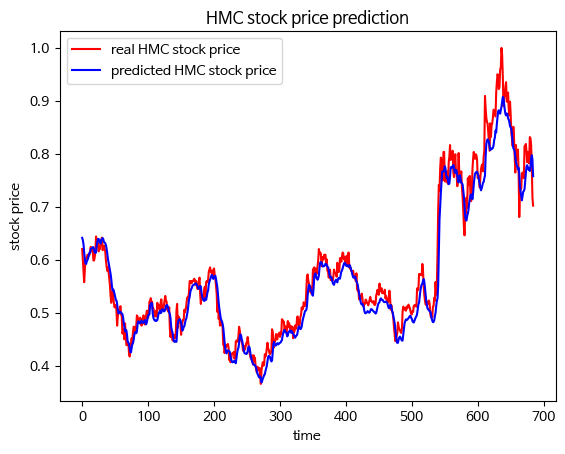

오늘 현대자동차 종가 : 227500 KRW
내일 현대자동차 주가 : 245456.92697423213 KRW
내일 주가 차이 :  17956.926974232134 KRW


<ipython-input-241-3ce8731c1b6d>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predict_value = df['종가'][-1] * pred_y_np[-1] / dfy['종가'].iat[-1]
<ipython-input-241-3ce8731c1b6d>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("오늘 현대자동차 종가 :", df['종가'][-1], 'KRW')
<ipython-input-241-3ce8731c1b6d>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("내일 주가 차이 : ", predict_value.item() - df['종가'][-1], 'KRW')


In [241]:
# pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real HMC stock price')
plt.plot(pred_y, color='blue', label='predicted HMC stock price')
plt.title('HMC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

pred_y_np = pred_y.numpy()
predict_value = df['종가'][-1] * pred_y_np[-1] / dfy['종가'].iat[-1]
print("오늘 현대자동차 종가 :", df['종가'][-1], 'KRW')
print("내일 현대자동차 주가 :", predict_value.item(), 'KRW')
print("내일 주가 차이 : ", predict_value.item() - df['종가'][-1], 'KRW')